# Exercise noteobook 

In [15]:
%matplotlib inline

import functions
import matplotlib.pyplot as plt
import numpy as np

## Loading the MNIST dataset

In [7]:
training_data = functions.torchvision.datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=functions.torchvision.transforms.ToTensor()
)

test_data = functions.torchvision.datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=functions.torchvision.transforms.ToTensor()
)

In [10]:
training_data, validation_data = functions.torch.utils.data.random_split(training_data, [0.8, 0.2], generator=functions.torch.Generator().manual_seed(55))

In [11]:
print('MNIST data loaded: train:',len(training_data),' examples, validation: ', len(validation_data), 'examples, test:',len(test_data), 'examples')
print('Input shape', training_data[0][0].shape)

MNIST data loaded: train: 48000  examples, validation:  12000 examples, test: 10000 examples
Input shape torch.Size([1, 28, 28])


Let's take a closer look. Here are the first 10 training digits:

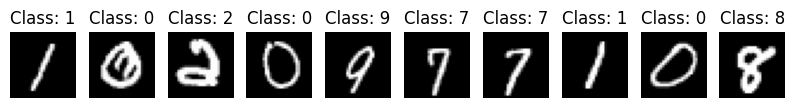

In [16]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(np.reshape(training_data[i][0], (28, 28)), cmap="gray")
    plt.title('Class: '+str(training_data[i][1]))

In [18]:
batch_size = 128
train_dataloader = functions.torch.utils.data.DataLoader(training_data, batch_size=batch_size)
val_dataloader = functions.torch.utils.data.DataLoader(validation_data, batch_size=batch_size)

In [19]:
train_dataloader.dataset[0][0].shape

torch.Size([1, 28, 28])

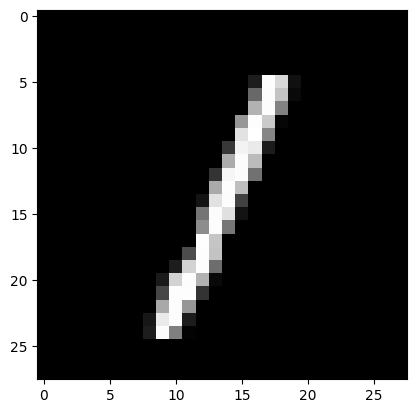

In [20]:
plt.imshow(np.reshape(train_dataloader.dataset[0][0], (28, 28)), cmap="gray")

## Reproduce the linear classifier given in the lectures

Let's start with the linear model. I reset it every time to not propagate old trainings. I use ADAM optimizer.

In [21]:
linear_model = functions.LinearClassifier()
print(linear_model)

loss_fn = functions.nn.CrossEntropyLoss()
optimizer = functions.torch.optim.Adam(linear_model.parameters(), lr=0.01)

LinearClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layer_1): Linear(in_features=784, out_features=10, bias=True)
)


In [22]:
%%time

functions.reset_parameters(linear_model)

acc_list_or = []
loss_list_or = []
epochs = 10
for j in range(epochs):
    functions.train_one_epoch(train_dataloader, linear_model, loss_fn, optimizer)
    
    # checking on the training loss and accuracy once per epoch
    acc, loss = functions.evaluate(train_dataloader, linear_model, loss_fn)
    print(f"Epoch {j}: training loss: {loss}, accuracy: {acc}")
    acc_list_or.append(acc)
    loss_list_or.append(loss)

Epoch 0: training loss: 0.2887014836470286, accuracy: 91.93333333333334
Epoch 1: training loss: 0.27206455725431444, accuracy: 92.45833333333333
Epoch 2: training loss: 0.2644000271757444, accuracy: 92.64791666666666
Epoch 3: training loss: 0.2595867946545283, accuracy: 92.78958333333334
Epoch 4: training loss: 0.2560760366121928, accuracy: 92.92291666666667
Epoch 5: training loss: 0.2533036870757739, accuracy: 92.98333333333333
Epoch 6: training loss: 0.251011114358902, accuracy: 93.05208333333333
Epoch 7: training loss: 0.2490677088300387, accuracy: 93.10000000000001
Epoch 8: training loss: 0.2473965152303378, accuracy: 93.13541666666667
Epoch 9: training loss: 0.24594520284732183, accuracy: 93.18958333333333
CPU times: user 8min 29s, sys: 1.23 s, total: 8min 30s
Wall time: 2min 52s


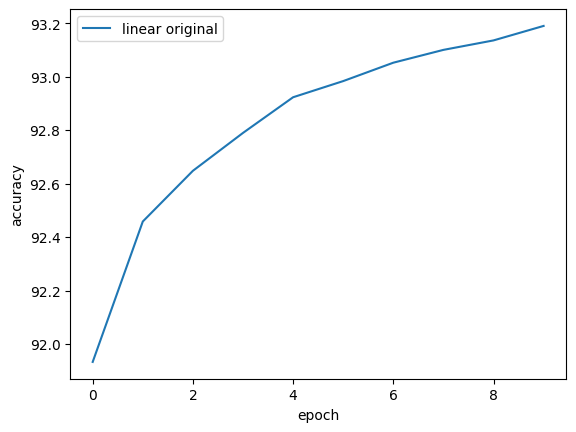

In [25]:
plt.plot(acc_list_or,label='linear original')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.show()

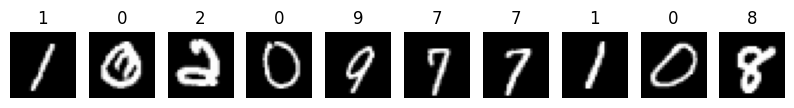

In [26]:
# Visualize how the model is doing on the first 10 examples
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))
linear_model.eval()
batch = next(iter(train_dataloader))
predictions = linear_model(batch[0])

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(batch[0][i,0,:,:], cmap="gray")
    plt.title('%d' % predictions[i,:].argmax())

Exercise: How can you improve the accuracy? Some things you might consider: increasing the number of epochs, changing the learning rate, etc. 

In [28]:
acc_val, loss_val = functions.evaluate(val_dataloader, linear_model, loss_fn)
print("Validation loss: %.4f, validation accuracy: %.2f%%" % (loss_val, acc_val))

Validation loss: 0.2989, validation accuracy: 91.93%


We can now take a closer look at the results.

Let's define a helper function to show the failure cases of our classifier.

Here are the first 10 images from the validation data that this small model classified to a wrong class:



Showing max 10 first failures. The predicted class is shown first and the correct class in parentheses.


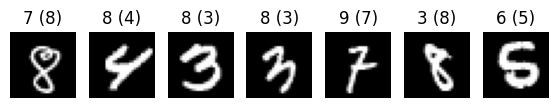

In [31]:
import importlib
importlib.reload(functions)
functions.show_failures(linear_model, val_dataloader)


### EXERCISE: Changing loss function and optimizer

In [73]:
#<!-- # Exercise:
#- Try changing the loss function,
#- Try changing the optimizer -->

<!-- # Exercise:
- Try changing the loss function,
- Try changing the optimizer -->

Changing the loss function to NLLLoss

In [37]:
# Changing the loss function
functions.reset_parameters(linear_model)
loss_fn =functions.nn.NLLLoss()

acc_list_nll= []
loss_list_nll = []
epochs = 10
for j in range(epochs):
    functions.train_one_epoch(train_dataloader, linear_model, loss_fn, optimizer)
    
    # checking on the training loss and accuracy once per epoch
    acc, loss = functions.evaluate(train_dataloader, linear_model, loss_fn)
    print(f"Epoch {j}: training loss: {loss}, accuracy: {acc}")
    acc_list_nll.append(acc)
    loss_list_nll.append(loss)

Epoch 0: training loss: -532.9970915527343, accuracy: 75.04375
Epoch 1: training loss: -982.3601038411458, accuracy: 75.02083333333334
Epoch 2: training loss: -1393.5381744791666, accuracy: 74.9375
Epoch 3: training loss: -1783.693287109375, accuracy: 74.81875
Epoch 4: training loss: -2161.212573893229, accuracy: 74.74583333333334
Epoch 5: training loss: -2530.75725, accuracy: 74.60416666666667
Epoch 6: training loss: -2895.118626302083, accuracy: 74.5
Epoch 7: training loss: -3256.047581380208, accuracy: 74.38333333333334
Epoch 8: training loss: -3614.675884765625, accuracy: 74.3
Epoch 9: training loss: -3971.749828776042, accuracy: 74.21666666666667


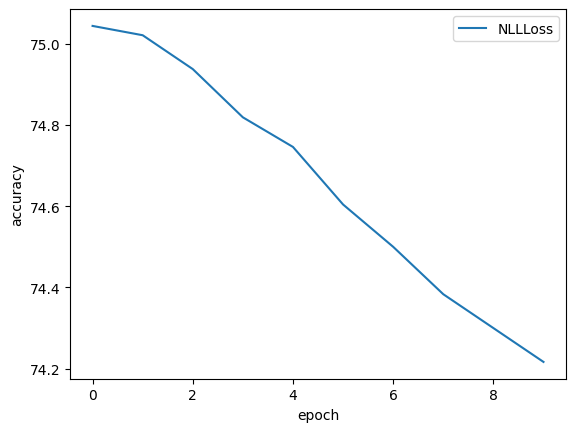

In [38]:
plt.plot(acc_list_nll,label='NLLLoss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

### Defining a focal loss. Repeat the former but with an optimizer

In [40]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = (self.alpha * (1 - pt) ** self.gamma) * ce_loss

        if self.reduction == 'mean':
            return torch.mean(focal_loss)
        elif self.reduction == 'sum':
            return torch.sum(focal_loss)
        else:
            return focal_loss


In [42]:
import optuna
n_trials=10
acc_list_foc = []
loss_list_foc = []
# Define the objective function for Optuna
def objective(trial):
    # With hyperparameter optimization
    alpha = trial.suggest_float('alpha', 0.1, 2.0)
    gamma = trial.suggest_float('gamma', 0.1, 5.0)

    # Create the Focal Loss function with the suggested hyperparameters
    focal_loss_fn = FocalLoss(alpha=alpha, gamma=gamma)
    # Train the model for one epoch
    functions.train_one_epoch(train_dataloader, linear_model, focal_loss_fn, optimizer)
    
    # Evaluate the model on the training dataset
    acc, loss = functions.evaluate(train_dataloader, linear_model, focal_loss_fn)
    acc_list_foc.append(acc)
    loss_list_foc.append(loss)
    # Return the negative accuracy as Optuna maximizes the score
    return acc

if __name__ == "__main__":
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    print("Best trial:")
    trial = study.best_trial
    print("  Value: ", trial.value)  # Convert back to positive accuracy
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))


[I 2024-03-05 11:52:57,549] A new study created in memory with name: no-name-e2980df3-912a-4722-8b6f-113981efd2cb
[I 2024-03-05 11:53:15,620] Trial 0 finished with value: 84.45625 and parameters: {'alpha': 0.6892697252657207, 'gamma': 3.2393127373280013}. Best is trial 0 with value: 84.45625.
[I 2024-03-05 11:53:32,798] Trial 1 finished with value: 86.53958333333334 and parameters: {'alpha': 0.8026269922888873, 'gamma': 1.4605647928065422}. Best is trial 1 with value: 86.53958333333334.
[I 2024-03-05 11:53:49,853] Trial 2 finished with value: 88.20625 and parameters: {'alpha': 1.447127710257492, 'gamma': 4.763756497025491}. Best is trial 2 with value: 88.20625.
[I 2024-03-05 11:54:08,129] Trial 3 finished with value: 88.77083333333333 and parameters: {'alpha': 0.7457494829203059, 'gamma': 4.538197765105093}. Best is trial 3 with value: 88.77083333333333.
[I 2024-03-05 11:54:25,177] Trial 4 finished with value: 89.13958333333333 and parameters: {'alpha': 0.4548087341964153, 'gamma': 1.6

Best trial:
  Value:  89.13958333333333
  Params: 
    alpha: 0.4548087341964153
    gamma: 1.6519223975920168


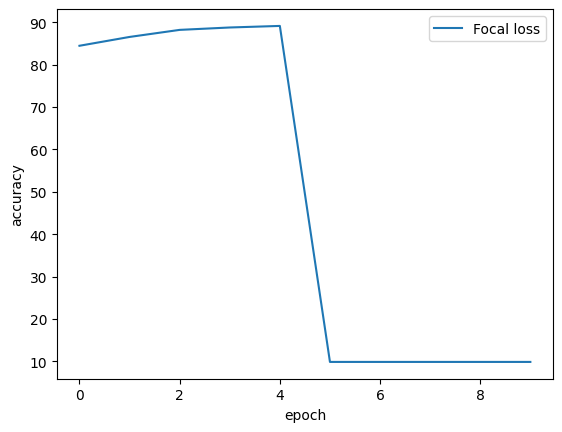

In [43]:
plt.plot(acc_list_foc,label='Focal loss')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

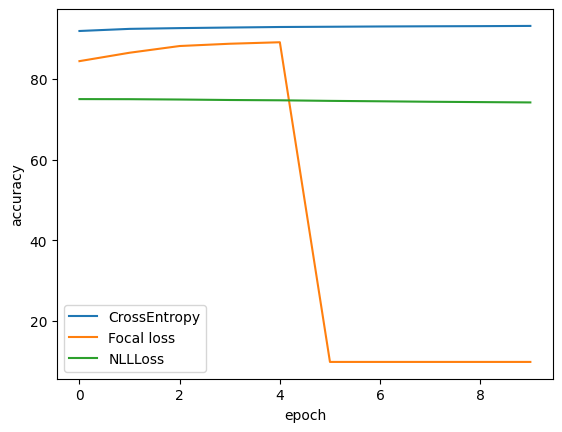

In [44]:
plt.plot(acc_list_or,label='CrossEntropy')
plt.plot(acc_list_foc,label='Focal loss')
plt.plot(acc_list_nll,label='NLLLoss')


plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

# Homework: train a Nonlinear Classifier

1. Write some code to train the NonlinearClassifier.
2. Create a data loader for the test data and check your model's accuracy on the test data. 

If you have time, experiment with how to improve the model. Note: training and validation data can be used to compare models, but test data should be saved until the end as a final check of generalization. 

# JupyterHub Reminder

From [Homework 0](https://github.com/argonne-lcf/ai-science-training-series/blob/main/00_introToAlcf/02_jupyterNotebooks.md): "If you simply close your browser window, or logout without shutting down the jupyter server, your job will continue to occupy the worker node. Be considerate and shutdown your job when you finish."

File --> Hub Control Panel --> Stop my server

In [46]:
batch_size = 128

# The dataloader makes our dataset iterable 
train_dataloader = functions.torch.utils.data.DataLoader(training_data, batch_size=batch_size)
val_dataloader = functions.torch.utils.data.DataLoader(validation_data, batch_size=batch_size)

Changed optimizer to Adam.

In [48]:
import importlib
importlib.reload(functions)
non_linear_model = functions.NonlinearClassifier()
print(non_linear_model)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(non_linear_model.parameters(), lr=0.01)

NonlinearClassifier(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (layers_stack): Sequential(
    (0): Linear(in_features=784, out_features=50, bias=True)
    (1): ReLU()
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): ReLU()
    (4): Linear(in_features=50, out_features=10, bias=True)
  )
)


In [49]:
%%time
acc_list_nl = []
loss_list_nl = []
epochs = 10
for j in range(epochs):
    functions.train_one_epoch(train_dataloader, non_linear_model, loss_fn, optimizer)
    
    # checking on the training loss and accuracy once per epoch
    acc, loss = functions.evaluate(train_dataloader, non_linear_model, loss_fn)
    print(f"Epoch {j}: training loss: {loss}, accuracy: {acc}")
    acc_list_nl.append(acc)
    loss_list_nl.append(loss)

Epoch 0: training loss: 0.14458150386810303, accuracy: 95.64166666666667
Epoch 1: training loss: 0.12693095286687214, accuracy: 96.09791666666668
Epoch 2: training loss: 0.10269852367043496, accuracy: 96.78541666666666
Epoch 3: training loss: 0.0811480125474433, accuracy: 97.46249999999999
Epoch 4: training loss: 0.09779797578416764, accuracy: 97.15416666666667
Epoch 5: training loss: 0.06777450011173884, accuracy: 97.92916666666667
Epoch 6: training loss: 0.06777889267976085, accuracy: 97.87708333333333
Epoch 7: training loss: 0.05679648578787844, accuracy: 98.25625
Epoch 8: training loss: 0.06325285934284329, accuracy: 98.08958333333334
Epoch 9: training loss: 0.06491155826797088, accuracy: 98.02916666666667
CPU times: user 10min 29s, sys: 1.31 s, total: 10min 30s
Wall time: 3min 5s


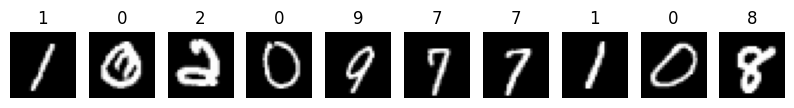

In [53]:
pltsize=1
plt.figure(figsize=(10*pltsize, pltsize))
non_linear_model.eval()
batch = next(iter(train_dataloader))
predictions = non_linear_model(batch[0])

for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(batch[0][i,0,:,:], cmap="gray")
    plt.title('%d' % predictions[i,:].argmax())

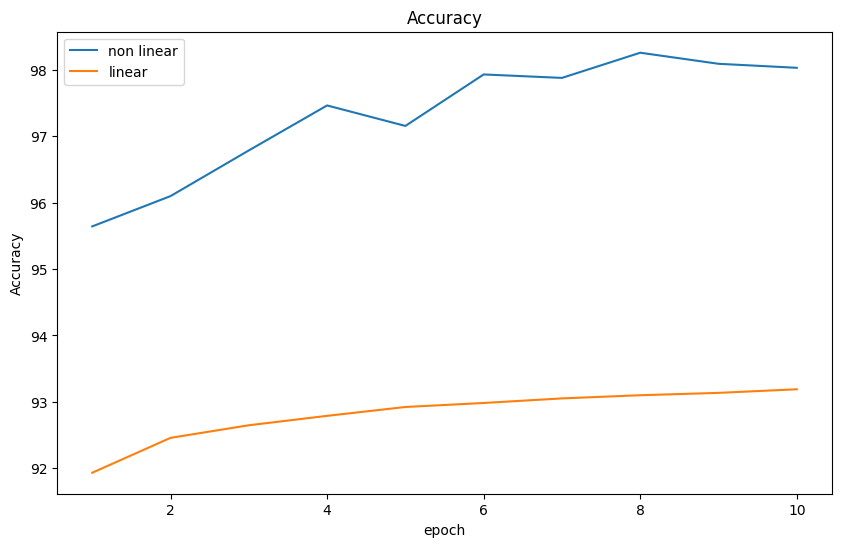

In [55]:
epoch_list=np.linspace(1,10,10)
plt.figure(figsize=(10, 6))
plt.plot(epoch_list,acc_list_nl,label='non linear')
plt.plot(epoch_list,acc_list_or,label='linear')

plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.title('%s' % 'Accuracy')
plt.legend()
plt.show()


In [56]:
acc_val, loss_val = functions.evaluate(val_dataloader, non_linear_model, loss_fn)
print("Validation loss: %.4f, validation accuracy: %.2f%%" % (loss_val, acc_val))

Validation loss: 0.1733, validation accuracy: 96.36%


Showing max 10 first failures. The predicted class is shown first and the correct class in parentheses.


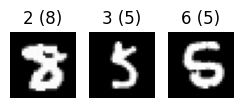

In [57]:
functions.show_failures(non_linear_model, val_dataloader, maxtoshow=10)